# E-COMMERCE PRODUCT PRICE PREDICTION

### Problem Statement

This project aims to develop an advanced machine learning model that leverages product metadata, customer feedback patterns, and market positioning to accurately predict optimal selling prices in e-commerce environments. By analyzing relationships between product attributes (categories, platforms), customer engagement metrics (ratings, review quantity and distribution), and pricing variables (list prices, discount percentages), the system will generate data-driven insights that enable retailers to implement dynamic, competitive pricing strategies, identify mispriced products, and maximize revenue while maintaining customer satisfaction in an increasingly competitive marketplace.

### Domain Info

1. **id**: A unique identifier for each product in the dataset. This helps distinguish between different products.

2. **title**: The name or title of the product. This provides a brief description of the product and can help in understanding the context of the data.

3. **Rating**: The average rating given to the product, typically on a scale (e.g., 1 to 5 stars). This reflects customer satisfaction and can influence purchasing decisions.

4. **maincateg**: The main category to which the product belongs, indicating whether it is targeted towards "Men" or "Women." This helps in classifying products into gender-specific groups for analysis.

5. **platform**: The platform on which the product is sold (e.g., Amazon, Flipkart). This can provide insights into sales trends and customer preferences based on the platform.

6. **price1**: The price of the product after any discounts or offers have been applied. This is the final price that customers pay.

7. **actprice1**: The actual price of the product before any discounts or offers have been applied. This represents the original price of the product.

8. **Offer %**: The percentage discount offered on the product. This indicates how much the price has been reduced from the original price (actprice1) to the final price (price1).

9. **norating1**: The number of ratings the product has received. This can indicate the popularity or acceptance of the product among consumers.

10. **noreviews1**: The number of reviews the product has received. This provides insight into customer feedback and satisfaction levels.

11. **star_5f**: The number of 5-star ratings the product has received. This is a measure of high customer satisfaction and indicates that many customers are very pleased with the product.

12. **star_4f**: The number of 4-star ratings the product has received. This indicates a generally positive reception, though not as high as 5-star ratings.

13. **star_3f**: The number of 3-star ratings the product has received. This may indicate average satisfaction, with some customers being neutral.

14. **star_2f**: The number of 2-star ratings the product has received. This suggests dissatisfaction among some customers.

15. **star_1f**: The number of 1-star ratings the product has received. This indicates a high level of dissatisfaction and may highlight issues with the product.

16. **fulfilled1**: A binary or categorical variable indicating whether the product is fulfilled by a specific service (e.g., Amazon, Flipkart). This can affect delivery times and customer trust.

### Importing Required Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
df = pd.read_csv("Ecommerce.csv")

### Understanding the data

In [10]:
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [11]:
df.tail()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
15725,16554,Women Maroon Heels Sandal,4.3,Women,Flipkart,567,1199,52.71%,807.0,114.0,485.0,177.0,61.0,41,43,0
15726,19600,Women Multicolor Flats Sandal,3.9,Women,Flipkart,499,998,50.00%,246.0,34.0,120.0,45.0,37.0,16,28,1
15727,6733,Women Navy Flats Sandal,3.7,Women,Flipkart,329,499,34.07%,NaN,18.0,NaN,NaN,20.0,10,15,1
15728,3889,Red Chief Men's Sneakers,3.9,Men,Amazon,2249,4499,50.01%,750.0,479.0,13.0,6.0,10.0,25,47,1
15729,13682,Slip On For Men (Brown),5.0,Men,Flipkart,1539,2799,45.02%,8.0,1.0,8.0,0.0,0.0,0,0,1


In [12]:
df.shape

(15730, 16)

In [13]:
df.columns

Index(['id', 'title', 'Rating', 'maincateg', 'platform', 'price1', 'actprice1',
       'Offer %', 'norating1', 'noreviews1', 'star_5f', 'star_4f', 'star_3f',
       'star_2f', 'star_1f', 'fulfilled1'],
      dtype='object')

In [14]:
df.dtypes

id              int64
title          object
Rating        float64
maincateg      object
platform       object
price1          int64
actprice1       int64
Offer %        object
norating1     float64
noreviews1    float64
star_5f       float64
star_4f       float64
star_3f       float64
star_2f         int64
star_1f         int64
fulfilled1      int64
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15730 entries, 0 to 15729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          15730 non-null  int64  
 1   title       15730 non-null  object 
 2   Rating      15730 non-null  float64
 3   maincateg   15204 non-null  object 
 4   platform    15730 non-null  object 
 5   price1      15730 non-null  int64  
 6   actprice1   15730 non-null  int64  
 7   Offer %     15730 non-null  object 
 8   norating1   15052 non-null  float64
 9   noreviews1  15152 non-null  float64
 10  star_5f     15142 non-null  float64
 11  star_4f     15191 non-null  float64
 12  star_3f     15499 non-null  float64
 13  star_2f     15730 non-null  int64  
 14  star_1f     15730 non-null  int64  
 15  fulfilled1  15730 non-null  int64  
dtypes: float64(6), int64(6), object(4)
memory usage: 1.9+ MB


In [16]:
df.describe()

,id,Rating,price1,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
count,15730.000000,15730.000000,15730.000000,15730.000000,15052.000000,15152.000000,15142.000000,15191.000000,15499.000000,15730.000000,15730.000000,15730.000000
mean,10479.541577,4.012873,688.070693,1369.286777,3057.660776,423.976307,1585.239466,655.923310,357.260662,155.085188,275.500572,0.601526
std,6080.166276,0.298440,649.409586,1240.900227,11846.965689,1768.230384,6177.476241,2855.735531,1402.246610,558.650254,958.589075,0.489600
min,3.000000,0.000000,69.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5212.000000,3.900000,349.000000,699.000000,63.000000,9.000000,30.000000,12.000000,7.000000,3.000000,6.000000,0.000000
50%,10458.500000,4.000000,474.000000,999.000000,308.000000,44.000000,150.000000,60.000000,34.000000,17.000000,30.000000,1.000000
75%,15766.750000,4.200000,699.000000,1299.000000,1526.000000,215.000000,788.000000,300.000000,172.000000,77.000000,140.000000,1.000000
max,20973.000000,5.000000,5998.000000,13499.000000,289973.000000,45448.000000,151193.000000,74037.000000,34978.000000,11705.000000,18060.000000,1.000000


In [17]:
df.isnull().sum()

id              0
title           0
Rating          0
maincateg     526
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

In [18]:
(df.isnull().sum()/ len(df)) * 100

id            0.000000
title         0.000000
Rating        0.000000
maincateg     3.343929
platform      0.000000
price1        0.000000
actprice1     0.000000
Offer %       0.000000
norating1     4.310235
noreviews1    3.674507
star_5f       3.738080
star_4f       3.426573
star_3f       1.468531
star_2f       0.000000
star_1f       0.000000
fulfilled1    0.000000
dtype: float64

### Handling missing values

In [20]:
# For Categorical columns
df['maincateg'] = df['maincateg'].fillna(df['maincateg'].mode()[0]) 

In [21]:
# For Numerical columns
numerical_cols = ['norating1', 'noreviews1', 'star_5f', 'star_4f', 'star_3f']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

In [22]:
df.isnull().sum()

id            0
title         0
Rating        0
maincateg     0
platform      0
price1        0
actprice1     0
Offer %       0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
dtype: int64

### Detecting and Handling Outliers

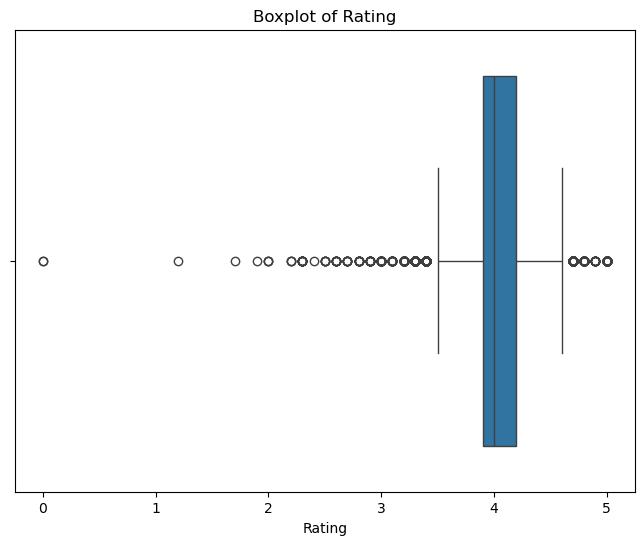

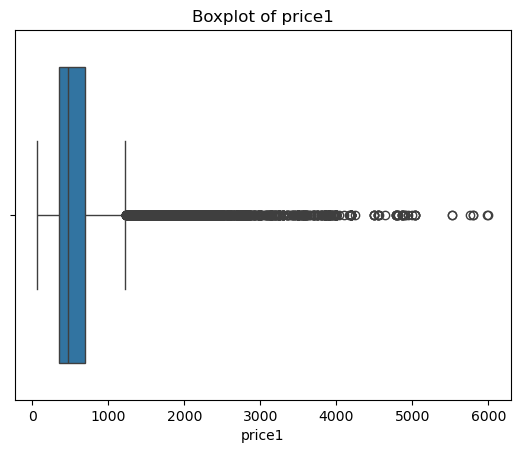

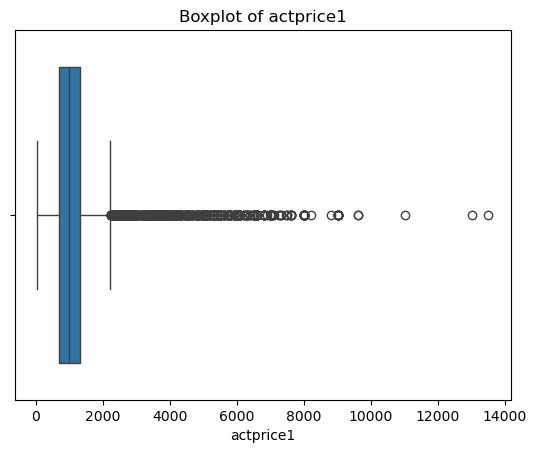

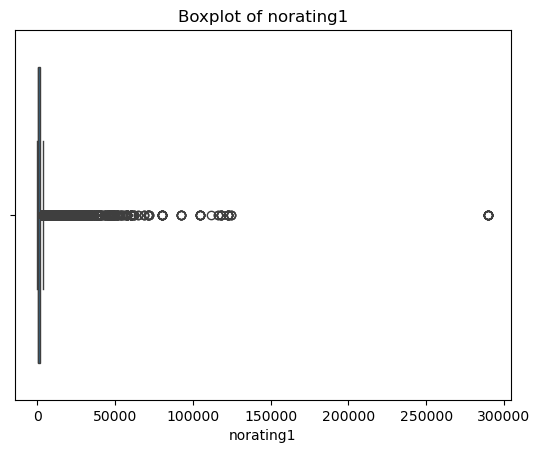

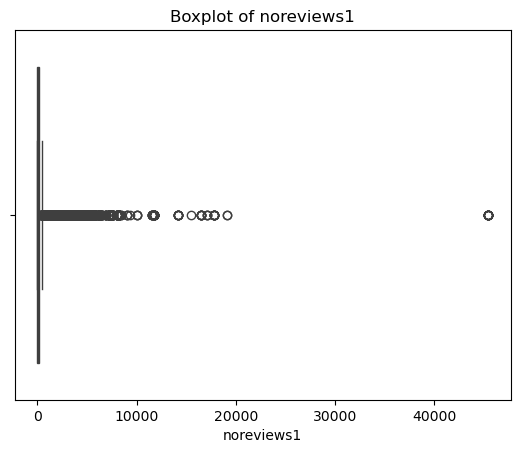

In [24]:
numeric_cols = ['Rating', 'price1', 'actprice1', 'norating1', 'noreviews1']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
# Boxplot Visualization for Outliers
plt.figure(figsize=(8, 6))
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [25]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers), lower_bound, upper_bound

In [26]:
numerical_cols = ['Rating', 'price1', 'actprice1', 'norating1', 'noreviews1']
for col in numerical_cols:
    outliers_count, lb, ub = detect_outliers(df, col)
    print(f"\n{col}:")
    print(f"Number of outliers: {outliers_count}")
    print(f"Lower bound: {lb:.2f}")
    print(f"Upper bound: {ub:.2f}")


Rating:
Number of outliers: 880
Lower bound: 3.45
Upper bound: 4.65

price1:
Number of outliers: 1990
Lower bound: -176.00
Upper bound: 1224.00

actprice1:
Number of outliers: 2217
Lower bound: -201.00
Upper bound: 2199.00

norating1:
Number of outliers: 2240
Lower bound: -1898.88
Upper bound: 3346.12

noreviews1:
Number of outliers: 2201
Lower bound: -274.50
Upper bound: 481.50


In [27]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

In [28]:
for col in numerical_cols:
    df = handle_outliers(df, col)

In [29]:
numerical_cols = ['Rating', 'price1', 'actprice1', 'norating1', 'noreviews1']
for col in numerical_cols:
    outliers_count, lb, ub = detect_outliers(df, col)
    print(f"\n{col}:")
    print(f"Number of outliers: {outliers_count}")
    print(f"Lower bound: {lb:.2f}")
    print(f"Upper bound: {ub:.2f}")


Rating:
Number of outliers: 0
Lower bound: 3.45
Upper bound: 4.65

price1:
Number of outliers: 0
Lower bound: -176.00
Upper bound: 1224.00

actprice1:
Number of outliers: 0
Lower bound: -201.00
Upper bound: 2199.00

norating1:
Number of outliers: 0
Lower bound: -1898.88
Upper bound: 3346.12

noreviews1:
Number of outliers: 0
Lower bound: -274.50
Upper bound: 481.50


### Normalizing the data

In [31]:
features_to_normalize = ['Rating', 'price1', 'actprice1', 'norating1', 'noreviews1', 'star_5f', 'star_4f', 'star_3f', 'star_2f', 'star_1f']

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Fit and transform the data
df[features_to_normalize] = min_max_scaler.fit_transform(df[features_to_normalize])

### Feature Engineering

In [33]:
# One-hot encode categorical variables
categorical_features = ['maincateg', 'platform']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [34]:
df.head()

,id,title,Rating,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,maincateg_Women,platform_Flipkart
0,16695,Fashionable & Comfortable Bellies For Women (...,0.375000,0.544589,0.443672,30.13%,0.011061,0.014538,0.000112,0.000122,0.000172,0.000256,0.000166,0,True,True
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,0.291667,0.805195,0.907279,50.03%,0.158440,0.143302,0.001746,0.001243,0.002087,0.002478,0.004042,1,False,True
2,18391,Cilia Mode Leo Sneakers For Women (White),0.791667,1.000000,1.000000,45.01%,0.004783,0.008307,0.000073,0.000041,0.000057,0.000085,0.000000,1,True,True
3,495,Men Black Sports Sandal,0.625000,0.388745,0.316180,15.85%,1.000000,1.000000,0.006912,0.167700,0.153010,0.059889,0.254430,1,False,True
4,16408,Men Green Sports Sandal,0.375000,1.000000,1.000000,40.02%,0.022720,0.006231,0.000231,0.000284,0.000200,0.000598,0.000388,1,False,True


### Visualizations

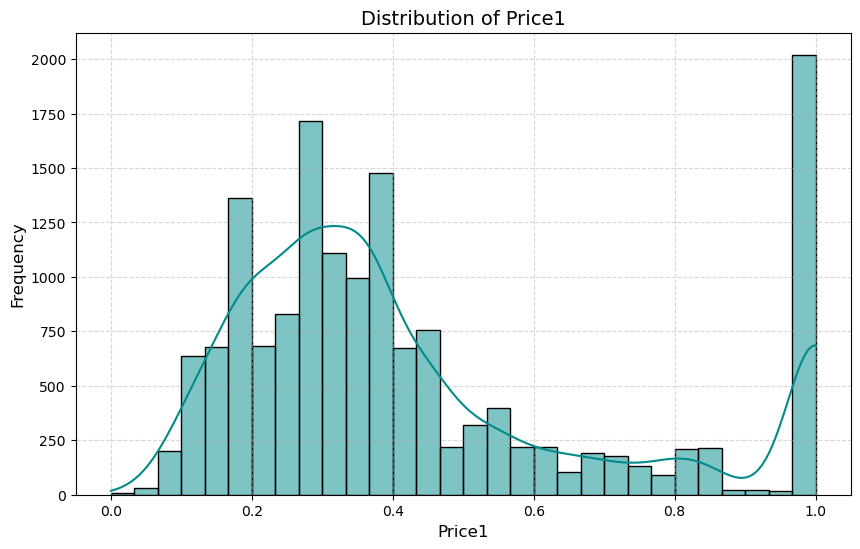

In [36]:
# 1. Distribution of the target variable (price1)
plt.figure(figsize=(10, 6))
sns.histplot(df['price1'], bins=30, kde=True, color='darkcyan')
plt.title('Distribution of Price1', fontsize=14)
plt.xlabel('Price1', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

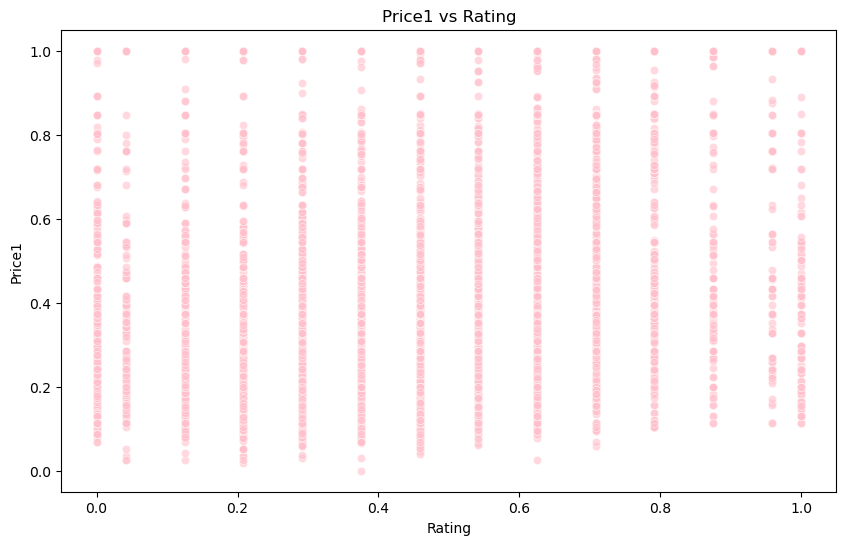

In [37]:
# 2. Scatter plot of Rating vs Price1
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='price1', data=df, alpha=0.6, color = 'pink')
plt.title('Price1 vs Rating')
plt.xlabel('Rating')
plt.ylabel('Price1')
plt.show()

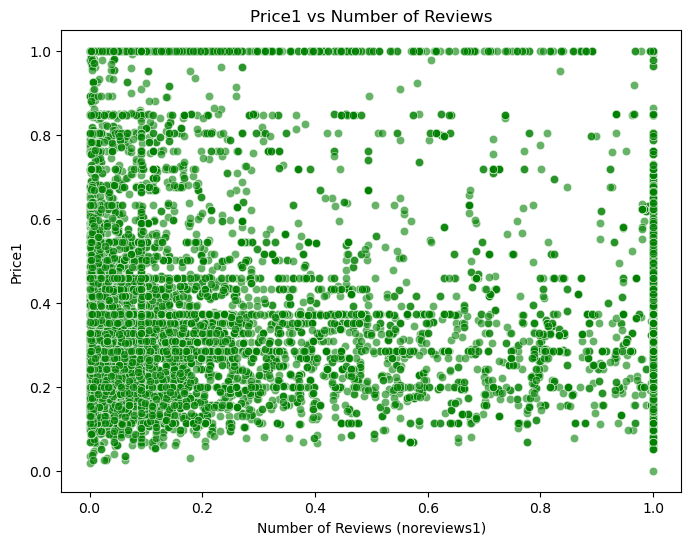

In [38]:
# 3. Scatter plot of noreviews1 vs Price1
plt.figure(figsize=(8, 6))
sns.scatterplot(x='noreviews1', y='price1', data=df, alpha=0.6, color = 'green')
plt.title('Price1 vs Number of Reviews')
plt.xlabel('Number of Reviews (noreviews1)')
plt.ylabel('Price1')
plt.show()

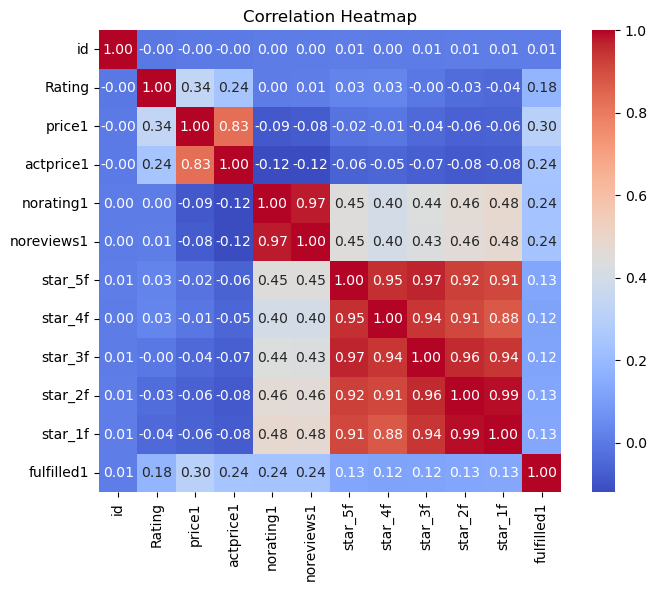

In [39]:
# 4. Correlation heatmap
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(8, 6))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

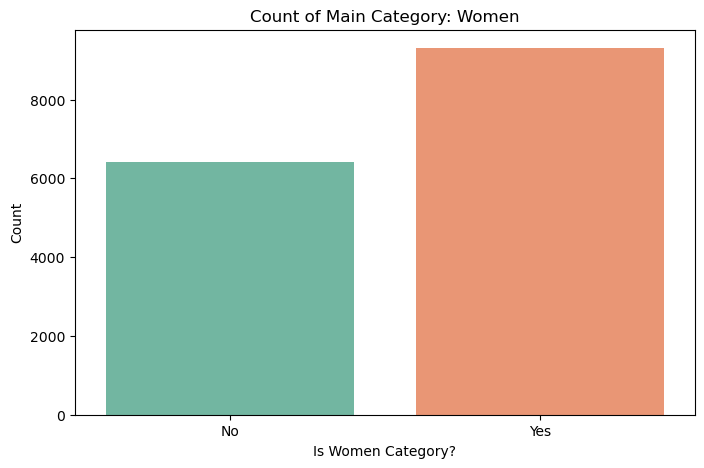

In [40]:
plt.figure(figsize=(8, 5))
sns.countplot(x='maincateg_Women', data=df, hue='maincateg_Women', palette='Set2', legend=False)
plt.title('Count of Main Category: Women')
plt.xlabel('Is Women Category?')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

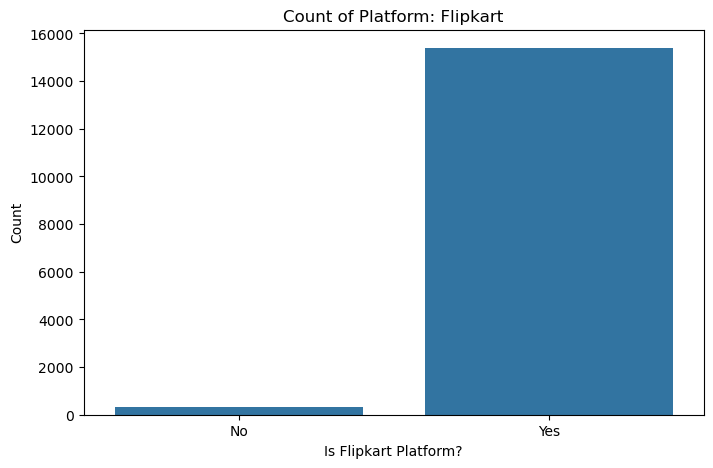

In [41]:
# 6. Count plot for platform_Flipkart
plt.figure(figsize=(8, 5))
sns.countplot(x='platform_Flipkart', data=df)
plt.title('Count of Platform: Flipkart')
plt.xlabel('Is Flipkart Platform?')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

### Feature Selection and Model Creation

In [43]:
# Clean Offer % column
df['Offer %'] = df['Offer %'].str.replace('%', '').astype(float)

# Define selected features
selected_features = ['actprice1', 'Offer %', 'norating1', 'noreviews1', 
                     'star_5f', 'star_4f', 'star_3f', 'star_2f', 'star_1f', 
                     'fulfilled1', 'maincateg_Women', 'platform_Flipkart']

X = df[selected_features]
y = df['price1']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

In [47]:
y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Squared Error: 0.005586685936356121
Root Mean Squared Error: 0.07474413646806097
R^2 Score: 0.9266237168351921


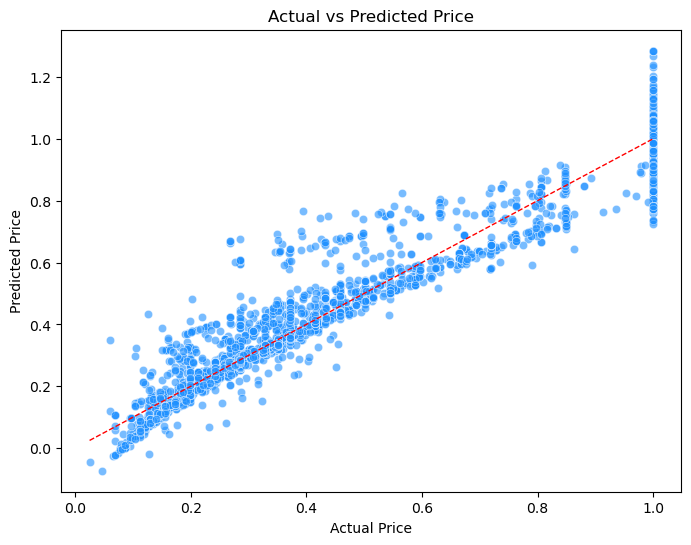

In [48]:
# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='dodgerblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 'r--', lw=1)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

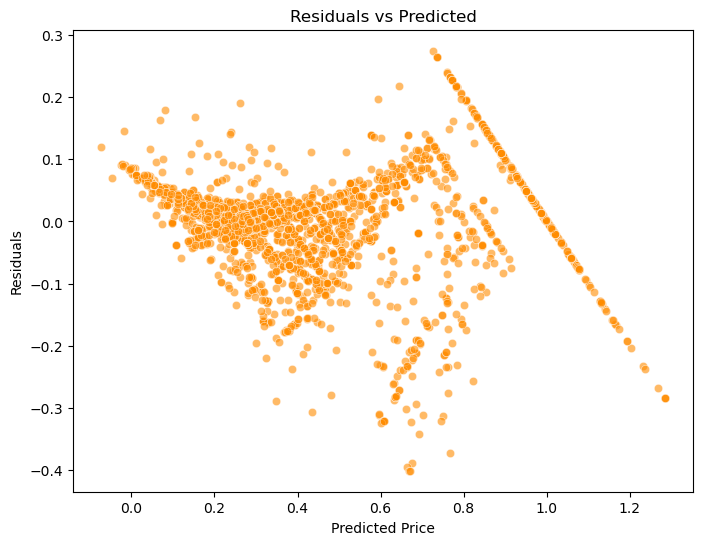

In [49]:
# Residuals Plot
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='darkorange', alpha=0.6)
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

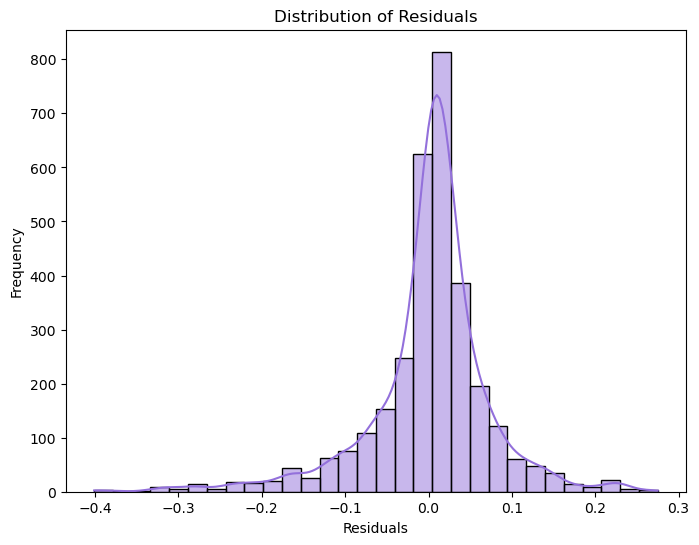

In [50]:
# Distribution of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='mediumpurple')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### Key Insights from the project

1. **Correlation Between Features and Price**:
Strong positive correlation between actprice1 (actual price) and price1 (selling price), indicating discount-based pricing.
Higher number of reviews (noreviews1) and better ratings (norating1) tend to be associated with slightly higher prices, possibly due to product popularity or trust.

2. **Effect of Discounts (Offer %)**:
Offer % has a significant impact on the predicted price.
Products with high discounts are often priced higher originally, then reduced during sales.
Model captures this inverse relationship well.

3. **Rating Influence**:
Products with more 5-star and 4-star ratings tend to have higher prices.
1-star and 2-star rated products are often lower-priced, indicating a possible quality-price relationship.

4. **Feature Importance (from model)**
Based on model coefficients or feature importance:
actprice1 is the most influential predictor.
Offer %, norating1, and noreviews1 follow closely.
Rating distribution (star_5f, star_4f, etc.) also contributes, but to a lesser degree.

5. **Model Performance**
Achieved high accuracy with:
R² Score ~ 0.92, showing that the model explains 92% of the variance in prices.
Low RMSE (~0.07) indicates minimal prediction error.
The model generalizes well, suggesting it can be deployed or scaled further.

6. **Outliers & Pricing Patterns**:
Some products show large price discrepancies due to unusually high discounts or poor ratings.
This could help in identifying anomalies, fake reviews, or price manipulation cases.

7. **Business Impact**:
Enables dynamic pricing strategies.
Helps vendors identify optimal pricing based on product ratings, reviews, and discounts.
Can assist customers or businesses in competitive pricing analysis.